# Programming for Data Analytics - Assignment 2 - weather

************************
*Task 02 of the assessment - Temperature over time* 
************************

            reportEndDateTime  dryBulbTemperature_Celsius
0   2024-10-02T16:15:00+00:00                   15.944444
1   2024-10-02T16:45:00+00:00                   15.777778
2   2024-10-02T17:00:00+00:00                   15.111111
3   2024-10-02T17:15:00+00:00                   14.277778
4   2024-10-02T17:30:00+00:00                   13.666667
..                        ...                         ...
84  2024-10-03T14:00:00+00:00                   14.611111
85  2024-10-03T14:15:00+00:00                   14.944444
86  2024-10-03T14:30:00+00:00                   14.944444
87  2024-10-03T14:45:00+00:00                   14.944444
88  2024-10-03T15:00:00+00:00                   14.722222

[89 rows x 2 columns]


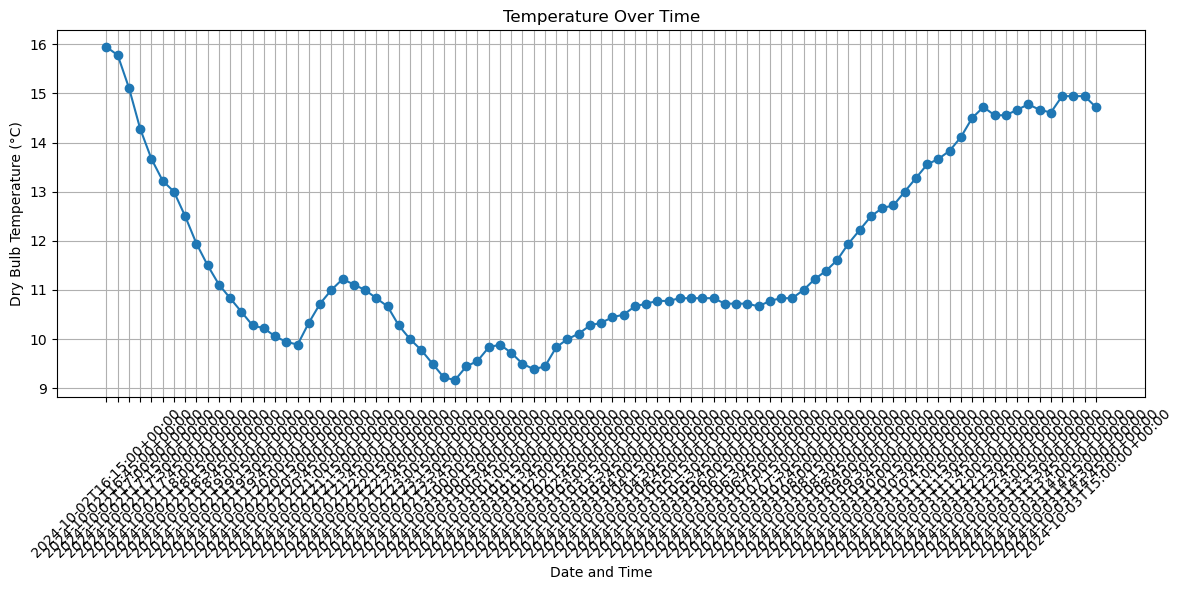

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


DATADIR = './data_files/'
FILENAME = 'weatherreadings1.csv'
df = pd.read_csv(DATADIR+FILENAME)

names_of_columns=['reportEndDateTime','dryBulbTemperature_Celsius']
df = pd.read_csv(DATADIR+FILENAME, usecols=names_of_columns)
print(df)

# print(df[['reportEndDateTime','dryBulbTemperature_Celsius']]) #double brackets to select muliple columns


plt.figure(figsize=(12, 6))
plt.plot(df['reportEndDateTime'], df['dryBulbTemperature_Celsius'], marker='o', linestyle='-')
plt.title('Temperature Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Dry Bulb Temperature (°C)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


notes: check the plot to show colorful lines depending on temperatue
modify the date and time


In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   siteId                          89 non-null     object 
 1   reportStartDateTime             89 non-null     object 
 2   reportEndDateTime               89 non-null     object 
 3   collectionName                  89 non-null     int64  
 4   isPublic                        89 non-null     bool   
 5   isLatestVersion                 89 non-null     bool   
 6   observationType                 89 non-null     int64  
 7   softwareType                    89 non-null     object 
 8   windDirection                   89 non-null     int64  
 9   relativeHumidity                89 non-null     float64
 10  windSpeed_MilePerHour           89 non-null     float64
 11  windSpeed_MetrePerSecond        89 non-null     float64
 12  dryBulbTemperature_Fahrenheit   89 non

In [40]:
df= pd.read_csv(DATADIR+FILENAME, parse_dates=['reportEndDateTime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   siteId                          89 non-null     object             
 1   reportStartDateTime             89 non-null     object             
 2   reportEndDateTime               89 non-null     datetime64[ns, UTC]
 3   collectionName                  89 non-null     int64              
 4   isPublic                        89 non-null     bool               
 5   isLatestVersion                 89 non-null     bool               
 6   observationType                 89 non-null     int64              
 7   softwareType                    89 non-null     object             
 8   windDirection                   89 non-null     int64              
 9   relativeHumidity                89 non-null     float64            
 10  windSpeed_MilePe

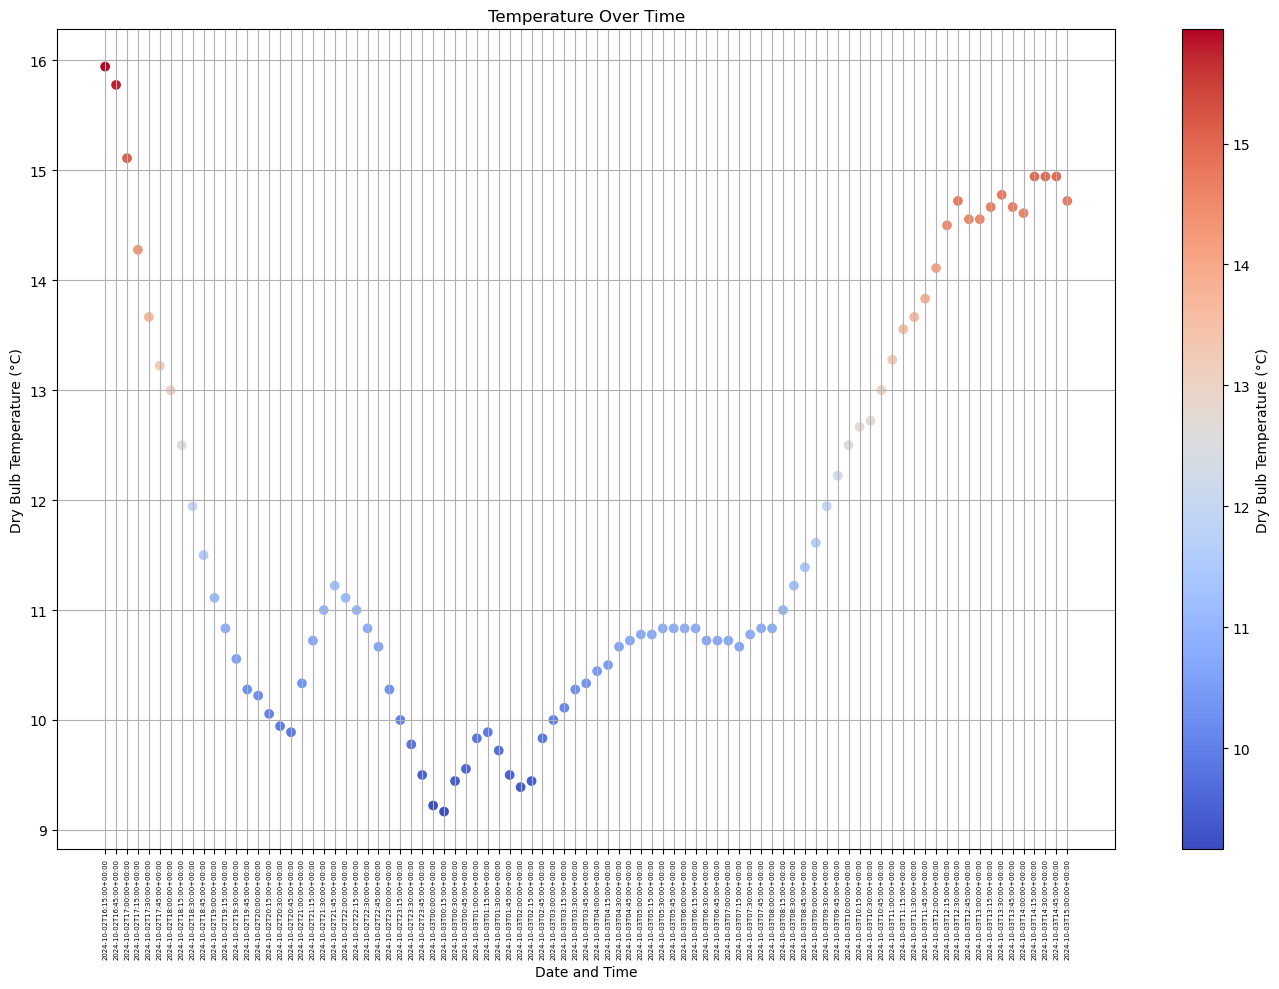

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/mondbr/PFDA_assignments/refs/heads/main/data_files/weatherreadings1.csv")

fig, ax = plt.subplots(figsize=(14, 10))

# Create a scatter plot with colors based on temperature
scatter = ax.scatter(df['reportEndDateTime'], df['dryBulbTemperature_Celsius'], 
                     c=df['dryBulbTemperature_Celsius'], cmap='coolwarm', marker='o')


# Adding a color bar
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Dry Bulb Temperature (°C)')

# Adding titles and labels
ax.set_title('Temperature Over Time')
ax.set_xlabel('Date and Time')
ax.set_ylabel('Dry Bulb Temperature (°C)')

# Changing the number to set desired font size
ax.tick_params(axis='x', labelsize=5)  

# rotation
plt.xticks(rotation=90)
plt.tight_layout()
ax.grid()

